In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#importing the dataset
day = pd.read_csv('day.csv')

In [3]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Performing Data Cleaning

In [4]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### There are no Null Values in any of the columns, hence data cleaning is not required

In [5]:
#Removing Unnecessary Columns that do not help in our analysis
day = day.drop(columns = ['instant','dteday','casual','registered'])

#### Removing the above columns for the following reasons: 
##### instant : It is just an index of each row hence it is not useful 
##### dteday : this variable is covered in other variable i.e., season, year and month
#### casual and registered : These variable are represented in the target variable, cnt = casual + registered

In [6]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Performing Univariate Analysis

In [7]:
#The columns season, month,weekday and
#weathersit correspond to different values for their current values,
#hence mapping them to their respective values
day['mnth'] = day['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
day['weekday'] = day['weekday'].map({6:'Sat',0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri'})
day['season']  = day['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
day['weathersit'] = day['weathersit'].map({1:'clear',2:'mist',3:'LightSnow',4:'HeavyRain'})

In [8]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
#Checking Outliers in the numerical columns
day[['temp','atemp','hum','windspeed','cnt']].describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


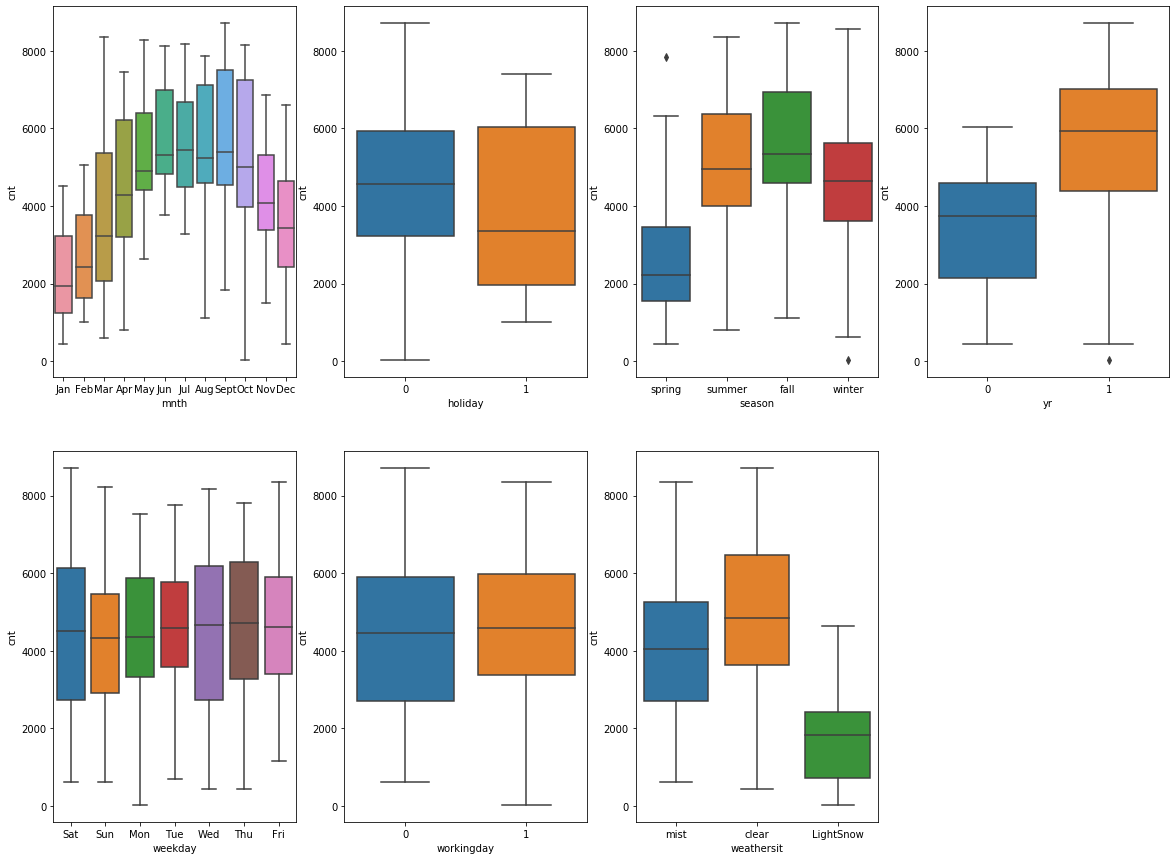

In [10]:
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(2,4,3)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(2,4,4)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.show()

#### Since the mean and median of all the columns are almost the same, we can conclude that there are no outliers in the data

In [11]:
#Creating dummy variables for all the categorical columns for ease of analysis
dummy_vars = pd.get_dummies(day[['season','mnth','weekday','weathersit']],drop_first = True)

In [12]:
dummy_vars.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_clear,weathersit_mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [13]:
day = pd.concat([day, dummy_vars], axis = 1)

In [14]:
day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_clear', 'weathersit_mist'],
      dtype='object')

In [15]:
#removing the original columns 
day = day.drop(columns = ['season','mnth','weekday','weathersit'])

In [16]:
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_clear', 'weathersit_mist'],
      dtype='object')

In [17]:
day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_clear,weathersit_mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0


## Performing Bivariate Analysis

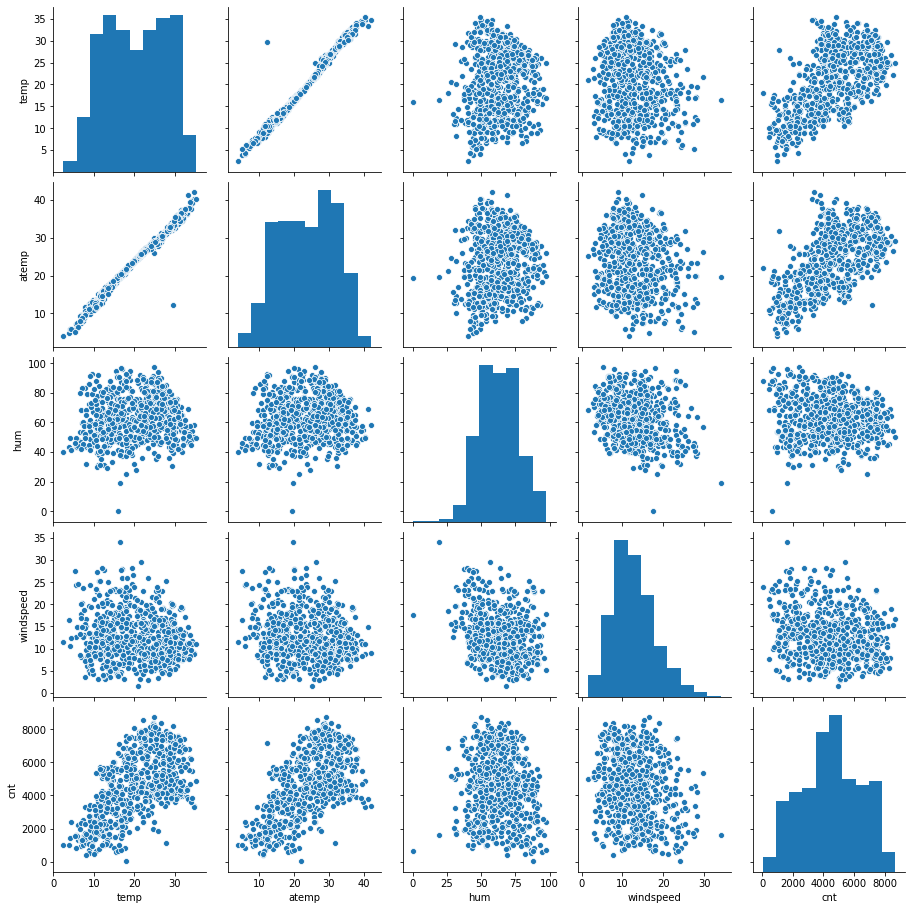

In [18]:
sns.pairplot(day[['temp','atemp','hum','windspeed','cnt']])
plt.show()

#### As we can see that temp and atemp have a linear relation among each other, let's look at the correlation value

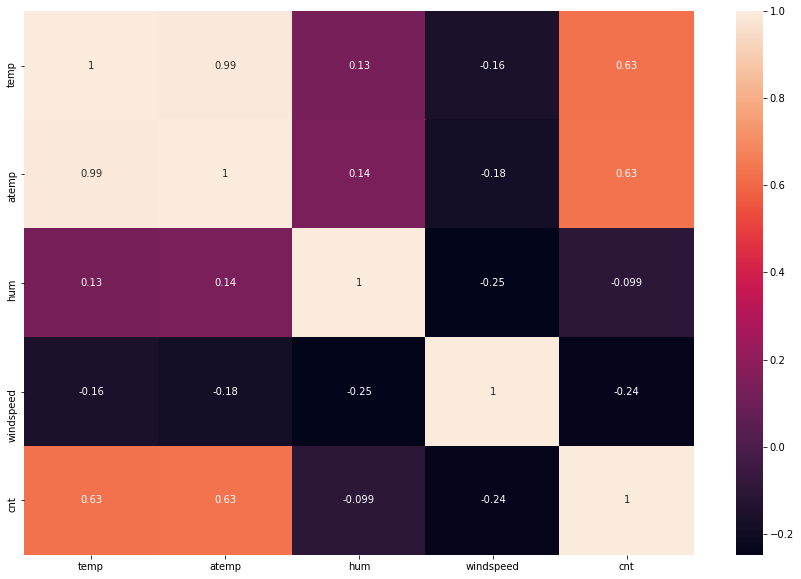

In [19]:
plt.figure(figsize = (15, 10))
sns.heatmap(day[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True)
plt.show()

#### It is evident that atemp and temp are highly correlated with each other, it would be better drop either one column, We will drop that while creatung the model using RFE and manual selection

## Data Preperation

In [20]:
#Splitting Data into Test and Train
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [21]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_clear,weathersit_mist
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,1,0,1,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


In [22]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_clear,weathersit_mist
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,1,1,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,1,1,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,1,0,0,1,0


In [23]:
#Rescaling the features using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
columns = list(df_train.columns)
scaler = scaler.fit(df_train)
df_train = scaler.transform(df_train)
df_test = scaler.transform(df_test)

In [24]:
df_train = pd.DataFrame(df_train, columns = columns)
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_clear,weathersit_mist
0,1.0,0.0,1.0,0.509887,0.501133,0.575354,0.300794,0.864243,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.815169,0.766351,0.725633,0.264686,0.827658,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.245101,0.200348,0.498067,0.663106,0.204096,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
df_test = pd.DataFrame(df_train, columns = columns)
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_clear,weathersit_mist
0,1.0,0.0,1.0,0.509887,0.501133,0.575354,0.300794,0.864243,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.815169,0.766351,0.725633,0.264686,0.827658,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.245101,0.200348,0.498067,0.663106,0.204096,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
# Dividing into X and y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

In [27]:
X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_clear,weathersit_mist
0,1.0,0.0,1.0,0.509887,0.501133,0.575354,0.300794,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.815169,0.766351,0.725633,0.264686,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.442393,0.438975,0.640189,0.255342,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.245101,0.200348,0.498067,0.663106,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.395666,0.391735,0.504508,0.188475,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,1.0,0.0,1.0,0.824514,0.762183,0.605840,0.355596,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
506,1.0,0.0,1.0,0.863973,0.824359,0.679690,0.187140,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
507,0.0,0.0,1.0,0.202618,0.218747,0.435939,0.111379,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
508,0.0,0.0,0.0,0.248216,0.223544,0.577930,0.431816,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
y_train

0      0.864243
1      0.827658
2      0.465255
3      0.204096
4      0.482973
         ...   
505    0.764151
506    0.832835
507    0.218017
508    0.312586
509    0.236424
Name: cnt, Length: 510, dtype: float64

## Building Model
### Initially using RFE to drill down to top 15 independant variables

In [29]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [30]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 14),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 13),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 10),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 15),
 ('weathersit_clear', True, 1),
 ('weathersit_mist', True, 1)]

In [32]:
#Checking the variables that have been selected
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sept', 'weekday_Sat', 'weathersit_clear',
       'weathersit_mist'],
      dtype='object')

In [33]:
# Checkign the variables that have been rejected
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

### Building Model using Stats Model for detailed statistics
#### Model 1

In [34]:
X_train_rfe = X_train[col]

In [35]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [36]:
# Running the Linear Model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [37]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          2.31e-191
Time:                        21:45:23   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0023      0.048  

##### constant has a p value above 0.05 so let us remove that and rebuild the model
#### Model 2

In [38]:
X_train_rfe = X_train_rfe.drop(columns=['const'])
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              1327.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):                        0.00
Time:                        21:45:23   Log-Likelihood:                          519.88
No. Observations:                 510   AIC:                                     -1010.
Df Residuals:                     495   BIC:                                     -946.2
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

##### mnth_Jan has a p value above 0.05 so let us remove that and rebuild the model
#### Model 3

In [39]:
X_train_rfe = X_train_rfe.drop(columns=['mnth_Jan'])
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              1413.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):                        0.00
Time:                        21:45:23   Log-Likelihood:                          517.86
No. Observations:                 510   AIC:                                     -1008.
Df Residuals:                     496   BIC:                                     -948.4
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

##### holiday has a p value above 0.05 so let us remove that and rebuild the model
#### Model 4

In [40]:
X_train_rfe = X_train_rfe.drop(columns=['holiday'])
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              1509.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):                        0.00
Time:                        21:45:23   Log-Likelihood:                          515.32
No. Observations:                 510   AIC:                                     -1005.
Df Residuals:                     497   BIC:                                     -949.6
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [41]:
#All the variables have desirable p value, let us check the VIF
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.00
2,temp,21.42
11,weathersit_clear,14.35
12,weathersit_mist,8.83
5,season_spring,5.51
1,workingday,4.79
4,windspeed,4.65
7,season_winter,4.03
6,season_summer,3.18
0,yr,2.09


##### humidity has high VIF value so let us remove that and rebuild the model
#### Model 5

In [42]:
X_train_rfe = X_train_rfe.drop(columns=['hum'])
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              1540.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):                        0.00
Time:                        21:45:23   Log-Likelihood:                          499.84
No. Observations:                 510   AIC:                                     -975.7
Df Residuals:                     498   BIC:                                     -924.9
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

##### season_summer has a p value above 0.05 so let us remove that and rebuild the model
#### Model 6

In [43]:
X_train_rfe = X_train_rfe.drop(columns=['season_summer'])
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              1673.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):                        0.00
Time:                        21:45:23   Log-Likelihood:                          498.39
No. Observations:                 510   AIC:                                     -974.8
Df Residuals:                     499   BIC:                                     -928.2
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [44]:
#All the variables have desirable p value, let us check the VIF
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,12.92
9,weathersit_clear,11.95
10,weathersit_mist,6.71
1,workingday,4.65
3,windspeed,4.29
4,season_spring,2.61
0,yr,2.07
8,weekday_Sat,1.83
5,season_winter,1.72
6,mnth_Jul,1.38


##### temp has high VIF value so let us remove that and rebuild the model
#### Model 7

In [45]:
X_train_rfe = X_train_rfe.drop(columns=['temp'])
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              1188.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):                        0.00
Time:                        21:45:23   Log-Likelihood:                          389.86
No. Observations:                 510   AIC:                                     -759.7
Df Residuals:                     500   BIC:                                     -717.4
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

##### month_Jul has a p value above 0.05 so let us remove that and rebuild the model
#### Model 8

In [46]:
X_train_rfe = X_train_rfe.drop(columns=['mnth_Jul'])
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              1313.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):                        0.00
Time:                        21:45:23   Log-Likelihood:                          388.26
No. Observations:                 510   AIC:                                     -758.5
Df Residuals:                     501   BIC:                                     -720.4
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [47]:
#All the variables have desirable p value, let us check the VIF
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,weathersit_clear,5.75
1,workingday,4.40
2,windspeed,4.22
8,weathersit_mist,3.77
0,yr,2.03
6,weekday_Sat,1.79
3,season_spring,1.56
4,season_winter,1.44
5,mnth_Sept,1.12


##### weathersit_clear has high VIF value so let us remove that and rebuild the model
#### Model 9

In [48]:
X_train_rfe = X_train_rfe.drop(columns=['weathersit_clear'])
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              490.5
Date:                Wed, 07 Apr 2021   Prob (F-statistic):                   1.01e-231
Time:                        21:45:24   Log-Likelihood:                          126.65
No. Observations:                 510   AIC:                                     -237.3
Df Residuals:                     502   BIC:                                     -203.4
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

##### weathersit_mist has a p value above 0.05 so let us remove that and rebuild the model
#### Model 10

In [49]:
X_train_rfe = X_train_rfe.drop(columns=['weathersit_mist'])
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                              558.3
Date:                Wed, 07 Apr 2021   Prob (F-statistic):                   1.60e-232
Time:                        21:45:24   Log-Likelihood:                          125.27
No. Observations:                 510   AIC:                                     -236.5
Df Residuals:                     503   BIC:                                     -206.9
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [50]:
#All the variables have desirable p value, let us check the VIF
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.36
1,workingday,2.91
0,yr,1.86
3,season_spring,1.50
6,weekday_Sat,1.48
4,season_winter,1.36
5,mnth_Sept,1.10


### Since All the p values and VIF values are within the expected range, we now have the final model that can be used

## Residual Analysis of the train data

In [51]:
y_train_cnt = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

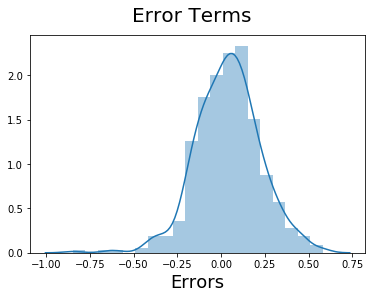

In [52]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
 # Plot heading 
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18) 

### As expected the error terms follow linear distribution

## Making Predictions using the Final Model

In [53]:
#Taking just the required Columns
X_train_rfe.columns

Index(['yr', 'workingday', 'windspeed', 'season_spring', 'season_winter',
       'mnth_Sept', 'weekday_Sat'],
      dtype='object')

In [54]:
#Dividing Into X test and y test
y_test = df_test.pop('cnt')
X_test = df_test

In [55]:
# Now let's use our model to make predictions.
X_test =  X_test[X_train_rfe.columns]
X_test.head()

,yr,workingday,windspeed,season_spring,season_winter,mnth_Sept,weekday_Sat
0,1.0,1.0,0.300794,0.0,1.0,0.0,0.0
1,1.0,1.0,0.264686,0.0,0.0,0.0,0.0
2,1.0,0.0,0.255342,1.0,0.0,0.0,1.0
3,1.0,0.0,0.663106,1.0,0.0,0.0,0.0
4,1.0,0.0,0.188475,0.0,0.0,0.0,1.0


In [56]:
# Adding a constant variable 
X_test = sm.add_constant(X_test)
#Dropping constant since the constant is not considered in the final list of variables
X_test = X_test.drop(columns=['const'])

In [57]:
X_test.head()

,yr,workingday,windspeed,season_spring,season_winter,mnth_Sept,weekday_Sat
0,1.0,1.0,0.300794,0.0,1.0,0.0,0.0
1,1.0,1.0,0.264686,0.0,0.0,0.0,0.0
2,1.0,0.0,0.255342,1.0,0.0,0.0,1.0
3,1.0,0.0,0.663106,1.0,0.0,0.0,0.0
4,1.0,0.0,0.188475,0.0,0.0,0.0,1.0


In [58]:
y_pred = lm.predict(X_test)

In [59]:
y_pred.head()

0    0.751233
1    0.701349
2    0.494440
3    0.310571
4    0.676729
dtype: float64

### Model Evaluation

Text(0, 0.5, 'y_pred')

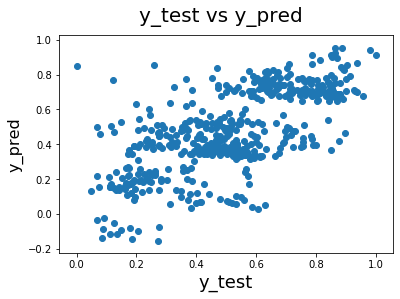

In [60]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

In [61]:
#Looking at Other Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [62]:
#Looking at RSME
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.18927389191015997

### The RMSE of the model is very less hence we can conclude that the model is a good fit 

In [63]:
#Checking the r2_squared
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.2883884387211012

#### The R2_squared of the model is very less hence it can be said that the model is overfitted to the train set